In [2]:
#matplotlib inline command
%matplotlib inline

#importing dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

#reading files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [4]:
#merging data files
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


In [5]:
#creating separate data frams by city type 
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]


In [6]:
#getting rides per city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [7]:
#getting fare per city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [8]:
#getting drivers per city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

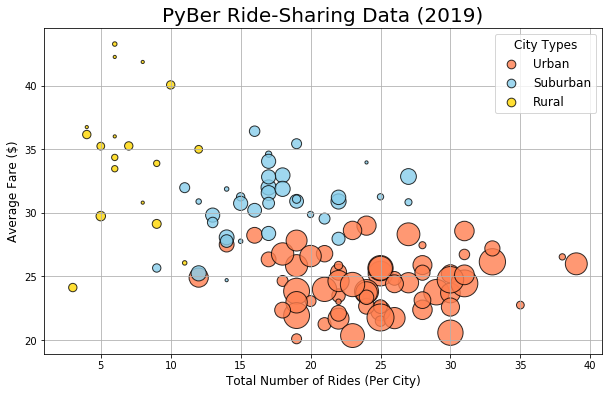

In [45]:
#create bubble chart for ride count, fare, and driver count by city type
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#creating legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.savefig("Analysis/Fig2.png")

In [46]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

#printing urban ride count stats
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
#printing suburban ride count stats
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")
#printing rural ride count stats
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).
The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 24.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([22]), count=array([7])).
The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [47]:
#printing urban fare stats
urban_fares = urban_cities_df["fare"]
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

#printing suburban fare stats
suburban_fares = suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

#printing rural fare stats
rural_fares = rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_suburban_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62
The median fare price for rural trips is $30.75.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [48]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
#pritning driver stats for urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.0f}")
median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.0f}")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}")

#printing driver stats for suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.0f}")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.0f}")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}")

#printing driver stats for rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers:.0f}")
median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.0f}")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}")


The mean driver count for urban cities is 37
The median driver count for urban cities is 37
The mode driver count for urban cities is ModeResult(mode=array([39]), count=array([86]))
The mean driver count for suburban cities is 14
The median driver count for suburban cities is 16
The mode driver count for suburban cities is ModeResult(mode=array([20]), count=array([79]))
The mean driver count for rural cities is 4
The median driver count for rural cities is 4
The mode driver count for rural cities is ModeResult(mode=array([1]), count=array([32]))


West Angela has the highest rider count


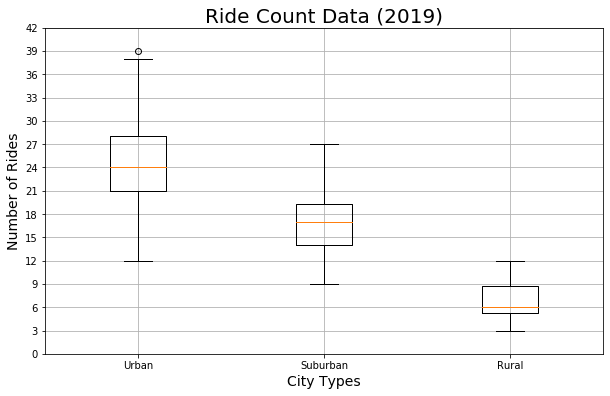

In [56]:
#box whisker plot for ride count
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

#save figure
plt.savefig("Analysis/Fig2.png")

urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count")

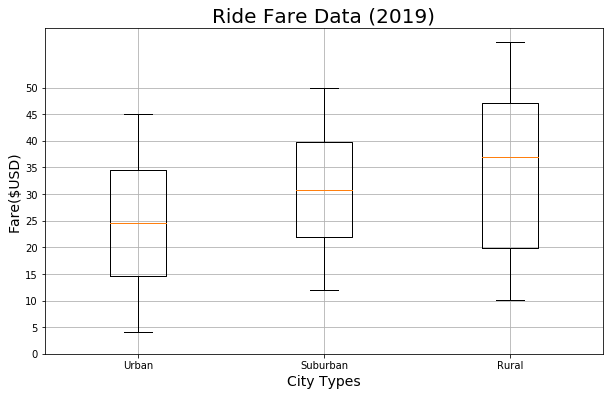

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [59]:
#box whisker plot for ride fares
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
print("Summary Statistics")
urban_fares.describe()

In [ ]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers)', fontsize=14)
ax.set_xlabel('City Type', fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
print("Summary Statistics")
urban_drivers.describe()